In [1]:
#Predict whether a building is high performance or not using machine learning algorithms such as desicion tree and svm
from IntelligentBuildingPerformanceDesign.AIBPD.data.preprocessing import PreprocessingCBECS
from IntelligentBuildingPerformanceDesign.AIBPD.data.database import Database
import numpy as np
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
database=Database()
CBECS_DF=database.select('CBECS2012')
CBECS_DF=CBECS_DF.fillna(0)

Load CBECS2012 successfully


C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


dataDF in preprocessing shape (1258, 715) level coolingLevel
top3 0.18541176470588236 top10 1.1277777777777778 top23 2.316829268292683 top25 2.51525 top75 10.614666666666666 top90 18.45562142857143


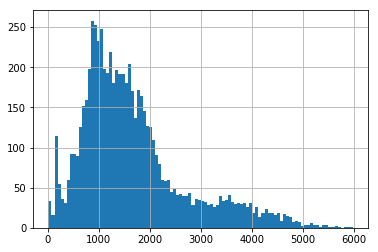

In [3]:
Preproc=PreprocessingCBECS()
CBECS_DF['CDD65'].hist(bins=100)
CBECS_DF=CBECS_DF[CBECS_DF['CDD65']>=500][CBECS_DF['principleActivity']>=2][CBECS_DF['principleActivity']<3]
CBECS_DF=Preproc.forCoolingClf(CBECS_DF)

In [4]:
HP=CBECS_DF[CBECS_DF['coolingLevel']==1.0]
MP=CBECS_DF[CBECS_DF['coolingLevel']==2.0]
LP=CBECS_DF[CBECS_DF['coolingLevel']==0.0]
m1=HP.shape[0]
m2=MP.shape[0]
m3=LP.shape[0]
print(HP['EUICooling'].mean(),HP['EUICooling'].std())
print(MP['EUICooling'].mean(),MP['EUICooling'].std())
print(LP['EUICooling'].mean(),LP['EUICooling'].std())

1.8139487679267863 0.3903454628128655
5.772284561133875 2.194994431349631
13.93122370137059 2.2230665712334146


In [5]:
HP['OCCUPYPC']=pd.cut(HP['OCCUPYP'],5,labels=range(5))
MP['OCCUPYPC']=pd.cut(MP['OCCUPYP'],5,labels=range(5))
LP['OCCUPYPC']=pd.cut(LP['OCCUPYP'],5,labels=range(5))
CBECS_DF['OCCUPYPC']=pd.cut(CBECS_DF['OCCUPYP'],5,labels=range(5))

HP['HEATPC']=pd.cut(HP['HEATP'],[0,50,90,101],labels=[1,2,3])
MP['HEATPC']=pd.cut(MP['HEATP'],[0,50,90,101],labels=[1,2,3])
LP['HEATPC']=pd.cut(LP['HEATP'],[0,50,90,101],labels=[1,2,3])
CBECS_DF['HEATPC']=pd.cut(CBECS_DF['HEATP'],[0,50,90,101],labels=[1,2,3])

HP['CDD65C']=pd.cut(HP['CDD65'],[500,1000,1500,2000,3000,1000000],labels=[1,2,3,4,5])
MP['CDD65C']=pd.cut(MP['CDD65'],[500,1000,1500,2000,3000,1000000],labels=[1,2,3,4,5])
LP['CDD65C']=pd.cut(LP['CDD65'],[500,1000,1500,2000,3000,1000000],labels=[1,2,3,4,5])
CBECS_DF['CDD65C']=pd.cut(CBECS_DF['CDD65'],[500,1000,1500,2000,3000,1000000],labels=[1,2,3,4,5])

HP['MONUSEC']=pd.cut(HP['MONUSE'],[0,6,9,10,13],labels=[1,2,3,4])
MP['MONUSEC']=pd.cut(MP['MONUSE'],[0,6,9,10,13],labels=[1,2,3,4])
LP['MONUSEC']=pd.cut(LP['MONUSE'],[0,6,9,10,13],labels=[1,2,3,4])
CBECS_DF['MONUSEC']=pd.cut(CBECS_DF['MONUSE'],[0,6,9,10,13],labels=[1,2,3,4])

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [6]:
from scipy.stats import chisquare
from collections import Counter
def printPvalue(featureName,HP,LP):
    feature_high=dict(Counter(HP[featureName]))
    feature_low=dict(Counter(LP[featureName]))
    list1=[]
    list2=[]
    for i in feature_high.keys():
        if i in feature_low.keys():
            list1.append(feature_high[i])
            list2.append(feature_low[i])
    chisq,pvalue=chisquare(list1,list2)
    print('p-value',featureName,'=',pvalue)

In [7]:
printPvalue('MAINCL',HP,LP)
printPvalue('insulationUpgrade',HP,LP)
printPvalue('buildingShape',HP,LP)
printPvalue('HVACUpgrade',HP,LP)
printPvalue('numFloors',HP,LP)
printPvalue('buildingAreaCategory',HP,LP)
printPvalue('WINTYP',HP,LP)
printPvalue('RENWLL',HP,LP)
printPvalue('OPNWE',HP,LP)
printPvalue('yrConstructionCategory',HP,LP)
printPvalue('wallConstruction',HP,LP)
printPvalue('WWR',HP,LP)
printPvalue('OWNTYPE',HP,LP)
printPvalue('MONUSEC',HP,LP)
printPvalue('region',HP,LP)
printPvalue('censusRegion',HP,LP)
printPvalue('climateZone',HP,LP)
printPvalue('numEmployeesCategory',HP,LP)
printPvalue('RENWLL',HP,LP)
printPvalue('WHOPPR',HP,LP)
printPvalue('roofConstuction',HP,LP)
printPvalue('principleActivity',HP,LP)
printPvalue('WKHRSC',HP,LP)
printPvalue('OCCUPYP',HP,LP)
printPvalue('ELHT1',HP,LP)
printPvalue('HEATPC',HP,LP)
printPvalue('CDD65C',HP,LP)

p-value MAINCL = 1.39335540590046e-11
p-value insulationUpgrade = 0.4202858423935846
p-value buildingShape = 0.0640706950282221
p-value HVACUpgrade = 0.06038637672526683
p-value numFloors = 2.1671734216324675e-11
p-value buildingAreaCategory = 1.365055235873011e-23
p-value WINTYP = 4.410227630381205e-06
p-value RENWLL = 0.10752413766937226
p-value OPNWE = 3.422597618131508e-09
p-value yrConstructionCategory = 6.247639390507127e-10
p-value wallConstruction = 2.255640052607108e-11
p-value WWR = 4.313831063639767e-44
p-value OWNTYPE = 2.6810674334655623e-18
p-value MONUSEC = nan
p-value region = 6.9893032464866055e-31
p-value censusRegion = 6.29951590602649e-47
p-value climateZone = 2.508662513603804e-94
p-value numEmployeesCategory = 3.601061305632181e-38
p-value RENWLL = 0.10752413766937226
p-value WHOPPR = 4.383946210423752e-07
p-value roofConstuction = 0.00016950846958389116
p-value principleActivity = nan
p-value WKHRSC = 3.3684687207267823e-12
p-value OCCUPYP = 9.844364116986998e-05

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


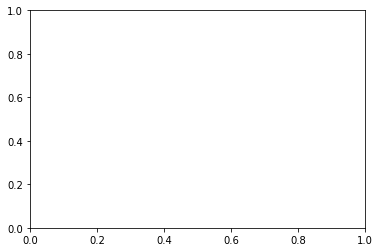

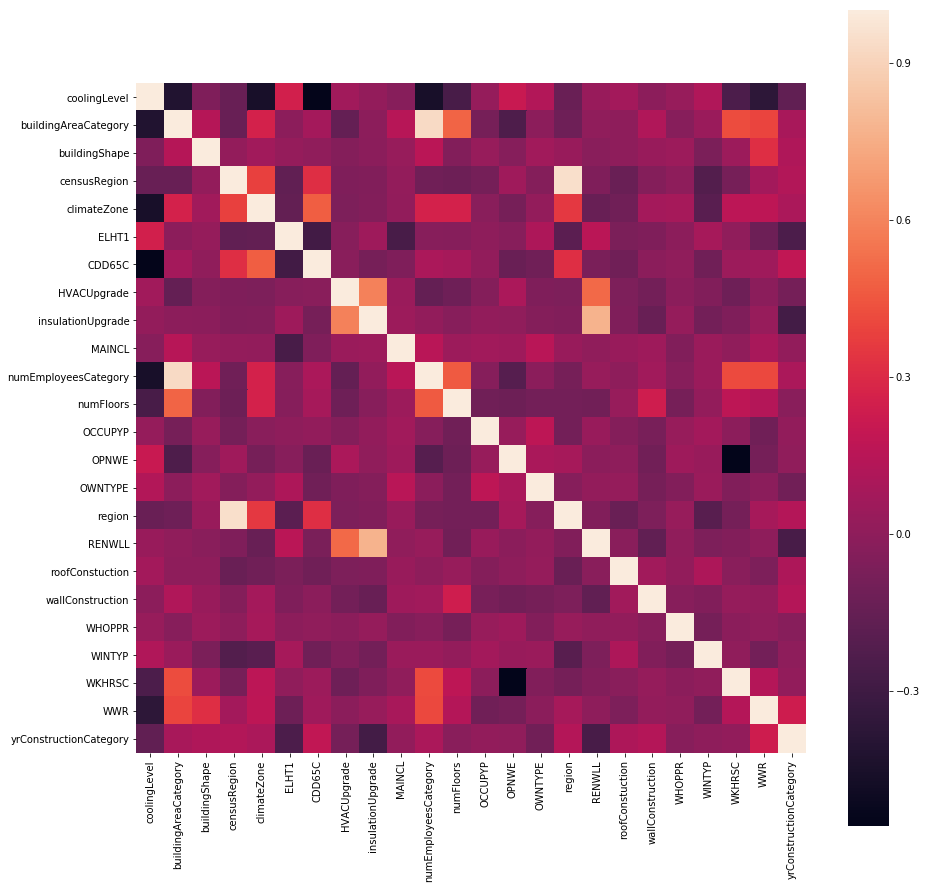

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import savefig
fig,ax = plt.subplots()
corrMattDF=CBECS_DF[CBECS_DF['coolingLevel']<=1.0][CBECS_DF['coolingLevel']>=0.0][['coolingLevel',\
                 'buildingAreaCategory','buildingShape','censusRegion','climateZone','ELHT1','CDD65C',\
                  'HVACUpgrade','insulationUpgrade','MAINCL','numEmployeesCategory','numFloors',\
                'OCCUPYP','OPNWE','OWNTYPE', 'region','RENWLL','roofConstuction','wallConstruction',\
                    'WHOPPR','WINTYP','WKHRSC','WWR','yrConstructionCategory']]
corrMattDF['CDD65C']=corrMattDF['CDD65C'].astype('int')
#corrMattDF['HEATPC']=corrMattDF['HEATPC'].astype('int')
corrMatt=corrMattDF.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax1 = plt.subplots(figsize=(15,15)) 
ax=sn.heatmap(corrMatt,square=True,ax=ax1)
figure = ax.get_figure()    
figure.savefig('corr_new15.jpg', dpi=300)

In [9]:
corrMatt

,coolingLevel,buildingAreaCategory,buildingShape,censusRegion,climateZone,ELHT1,CDD65C,HVACUpgrade,insulationUpgrade,MAINCL,...,OWNTYPE,region,RENWLL,roofConstuction,wallConstruction,WHOPPR,WINTYP,WKHRSC,WWR,yrConstructionCategory
coolingLevel,1.000000,-0.418480,-0.057886,-0.138945,-0.458570,0.251452,-0.548736,0.066052,0.018060,-0.026981,...,0.125507,-0.137464,0.037048,0.073625,-0.004675,0.029270,0.120018,-0.244745,-0.369658,-0.162973
buildingAreaCategory,-0.418480,1.000000,0.140030,-0.141964,0.261898,-0.007836,0.080231,-0.154990,-0.004713,0.146223,...,-0.006334,-0.114570,0.006585,0.001191,0.117933,-0.024333,0.039834,0.420393,0.396729,0.088296
buildingShape,-0.057886,0.140030,1.000000,0.018575,0.068065,0.021753,0.007361,-0.038876,-0.012149,0.028978,...,0.066340,0.034227,-0.017046,-0.002037,0.033670,0.050070,-0.069317,0.050260,0.313842,0.113236
censusRegion,-0.138945,-0.141964,0.018575,1.000000,0.381936,-0.162240,0.312683,-0.057486,-0.049161,0.016498,...,-0.039183,0.947770,-0.052551,-0.135262,-0.037336,0.001400,-0.220892,-0.085330,0.071679,0.124462
climateZone,-0.458570,0.261898,0.068065,0.381936,1.000000,-0.158921,0.472719,-0.060711,-0.045165,0.012032,...,0.016909,0.349961,-0.139910,-0.111918,0.076566,0.082079,-0.195206,0.160717,0.168009,0.101176
ELHT1,0.251452,-0.007836,0.021753,-0.162240,-0.158921,1.000000,-0.284790,-0.027211,0.055687,-0.263725,...,0.106733,-0.187184,0.158634,-0.069408,-0.052467,-0.007308,0.081990,0.004267,-0.121394,-0.245775
CDD65C,-0.548736,0.080231,0.007361,0.312683,0.472719,-0.284790,1.000000,-0.017266,-0.083667,-0.053299,...,-0.109472,0.315891,-0.075898,-0.108229,-0.011341,0.004634,-0.109891,0.050925,0.062608,0.183537
HVACUpgrade,0.066052,-0.154990,-0.038876,-0.057486,-0.060711,-0.027211,-0.017266,1.000000,0.591971,0.040917,...,-0.058377,-0.062106,0.509936,-0.061927,-0.096052,-0.010726,-0.047604,-0.118796,-0.014952,-0.089871
insulationUpgrade,0.018060,-0.004713,-0.012149,-0.049161,-0.045165,0.055687,-0.083667,0.591971,1.000000,0.047405,...,-0.034733,-0.052135,0.768944,-0.054364,-0.142083,0.025668,-0.098985,-0.053499,0.029712,-0.281313
MAINCL,-0.026981,0.146223,0.028978,0.016498,0.012032,-0.263725,-0.053299,0.040917,0.047405,1.000000,...,0.150307,0.034048,0.005355,0.035096,0.051356,-0.051614,0.042926,0.002635,0.089441,0.011982


In [10]:
X=corrMattDF.values[:,1:]
Y=corrMattDF.values[:,0]
m=corrMattDF.shape[0]
n=int(0.7*m)

In [11]:
from sklearn import tree
clf_dt=tree.DecisionTreeClassifier()
clf_dt.fit(X[:n,:],Y[:n])
Y_dt=clf_dt.predict(X[n:m,:])
print(clf_dt.score(X[n:m,:],Y[n:m]))

0.7456140350877193


In [12]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import KFold

In [20]:

X_train, X_test, y_train, y_test = train_test_split(
    corrMattDF.values[:,1:],
    corrMattDF.values[:,0],
    test_size=0.2,
    random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()
for j in range(1,24):
    #print('Training dataset shape:', X_train.shape, y_train.shape)
    #print('Testing dataset shape:', X_test.shape, y_test.shape)
    j1=24-j
    clf = svm.SVC()
    sfs1 = sfs(clf,
               k_features=j1,
               forward=False,
               floating=False,
               verbose=2,
               scoring='accuracy',
               cv=5)

    # Perform SFFS
    sfs1 = sfs1.fit(corrMattDF.values[:,1:], corrMattDF.values[:,0])
    feat_cols = list(sfs1.k_feature_idx_)
    print(feat_cols)
    #for i in feat_cols:
        #print(column[i])

   
    kf = KFold(n_splits=5)
    errorList=[]
    X1=X[:,feat_cols]
    Y1=Y
    for train_index, test_index in kf.split(X1,Y1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = Y1[train_index], Y1[test_index]
        clf2 = svm.SVC(gamma='auto')
        clf2.fit(X_train,y_train) 
        error=1-clf2.score(X_test,y_test)
        errorList.append(error)
    error2=np.mean(errorList)
    print(1-error2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


NameError: name 'KFold' is not defined

In [13]:
column=list(corrMattDF.columns)

In [25]:
clf = svm.SVC()
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(corrMattDF.values[:,1:], corrMattDF.values[:,0])
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
for i in feat_cols:
    print(column[i])

kf = KFold(n_splits=5)
errorList=[]
X1=X[:,feat_cols]
Y1=Y
for train_index, test_index in kf.split(X1,Y1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y1[train_index], Y1[test_index]
    clf2 = svm.SVC(gamma='auto')
    clf2.fit(X_train,y_train) 
    error=1-clf2.score(X_test,y_test)
    errorList.append(error)
error2=np.mean(errorList)
print(1-error2)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.6s finished

[2019-04-21 22:44:56] Features: 1/10 -- score: 0.7488620199146516[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished

[2019-04-21 22:44:57] Features: 2/10 -- score: 0.8278805120910384[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2019-04-21 22:44:57] Features: 3/10 -- score: 0.8357752489331436[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2019-04-21 22:44:58] Features: 4/10 -- score: 0.8331436699857753[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    

[3, 4, 5, 7, 9, 12, 14, 15, 18, 21]
censusRegion
climateZone
ELHT1
HVACUpgrade
MAINCL
OCCUPYP
OWNTYPE
region
wallConstruction
WKHRSC
0.8703508771929824


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.4s finished

[2019-04-21 22:45:02] Features: 10/10 -- score: 0.8729729729729729

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [24]:
X_new=[]
Y_new=[]
X_0=[]
Y_0=[]
for i in range(X.shape[0]):
    if kmeans.predict(X[i].reshape(1,23))[0]==1:
        X_new.append(X[i])
        Y_new.append(Y[i])
    else:
        X_0.append(X[i])
        Y_0.append(X[i])

In [25]:
X_new=np.array(X_new)
Y_new=np.array(Y_new)

In [26]:
clf = svm.SVC()
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_new,Y_new)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
for i in feat_cols:
    print(column[i])

kf = KFold(n_splits=5)
errorList=[]
X1=X[:,feat_cols]
Y1=Y
for train_index, test_index in kf.split(X1,Y1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y1[train_index], Y1[test_index]
    clf2 = svm.SVC(gamma='auto')
    clf2.fit(X_train,y_train) 
    error=1-clf2.score(X_test,y_test)
    errorList.append(error)
error2=np.mean(errorList)
print(1-error2)

ValueError: The number of classes has to be greater than one; got 1